# Pandas 데모 - Explarotary Data Analysis
## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2                  
#autoreload: 주피터 내에서 변경된 또는 새로운 lib 자동 반영(Set to Normal 2)
%matplotlib inline             
#파일형식(X) 주피터 내부에서 이미지로 볼 수 있음

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)       #그림 사이즈 지정
plt.style.use('fivethirtyeight')           #그림 기본 스타일
pd.set_option('max_columns', 100)          #칼럼 100개 허용
pd.set_option("display.precision", 4)      #소수점 4자리허용
warnings.simplefilter('ignore')            #경고분 무시

In [4]:
#!ls -al C:\Users\USER\Desktop\오픈소스SW설계\단국대\DataInput
#리눅스 명령어,,;;

## 데이터 경로

In [5]:
data_dir = Path('C:\\Users\\USER\\Desktop\\오픈소스SW설계\\단국대\\DataInput\\')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'      #feature file : EDA 마치고 별도로 특징 저장할 파일
seed = 42                                    #랜덤 지정 수 결정해줌

## EDA
### 학습데이터 로드

In [6]:
trn = pd.read_csv(trn_file, index_col=0)     #새로운 인덱스 컬럼 추가없이+0번 칼럼을 인덱스로 사용하겠다
print(trn.shape)
trn.head()                                   #위에서 5줄 출력

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


In [7]:
trn.tail()                                    # 마지막 줄부터 5줄

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
319995,18.3656,17.2409,16.7739,16.4850,16.3404,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,2,2,1.0930,1.0888,1.0973,1.0951,1.0909,2
319996,18.6856,17.6658,17.1904,16.8169,16.6367,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,2,2,1.0517,1.0508,1.0526,1.0522,1.0513,1
319997,21.1890,18.4234,17.2956,16.9011,16.6841,-1.0148e-05,20.9890,18.3076,17.2152,16.8403,16.6355,31,30,1.1933,1.1941,1.1925,1.1929,1.1937,0
319998,18.8472,17.3186,16.5057,16.1806,15.9116,-4.5209e-05,16.3900,15.4058,15.1823,15.1969,15.1793,1,1,1.1725,1.1726,1.1725,1.1725,1.1725,0
319999,19.8604,18.8199,18.5156,18.4149,18.3080,-9.6544e-04,19.8256,18.7819,18.4908,18.3987,18.3098,1,1,1.0571,1.0562,1.0580,1.0575,1.0567,0


### 데이터 개요

In [8]:
trn.describe()                                 #mean: 평균값, 25%: 25%에 해당하는 값  ..

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,3.2000e+05,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000
mean,19.8524,18.3768,17.7358,17.1742,16.8752,5.8308e-02,19.6289,18.2271,17.6154,17.1523,16.8693,6.3327,6.1388,1.1758,1.1765,1.1751,1.1754,1.1761,1.1163
std,1.9455,31.1108,1.4662,52.5615,57.1463,5.7546e-01,1.9236,17.7866,1.4730,25.0758,35.4365,8.8811,8.5516,0.1163,0.1181,0.1147,0.1155,0.1172,0.9235
min,-17.6875,-17555.3656,7.7314,-23955.8178,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,1.0000,1.0000,1.0001,1.0000,1.0002,1.0001,1.0000,0.0000
25%,18.7242,17.4749,16.8772,16.5239,16.2889,3.5580e-05,18.5636,17.3484,16.7871,16.4530,16.2341,1.0000,1.0000,1.0882,1.0884,1.0878,1.0880,1.0883,0.0000
50%,19.4194,18.1405,17.5258,17.1497,16.9176,4.7129e-02,19.2646,18.0224,17.4434,17.0874,16.8694,2.0000,2.0000,1.1793,1.1792,1.1794,1.1794,1.1793,1.0000
75%,20.4321,19.0732,18.4281,18.0074,17.7289,9.4597e-02,20.1976,18.8884,18.2911,17.9070,17.6557,5.0000,5.0000,1.2275,1.2260,1.2292,1.2286,1.2268,2.0000
max,58.6233,46.3383,72.0097,50.1641,52.6127,6.2323e+01,30.7779,30.6132,31.9572,32.0162,30.7813,44.0000,42.0000,2.0508,2.0803,2.0221,2.0363,2.0654,2.0000


In [9]:
trn.dtypes

u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

### 종속변수 분포

In [10]:
trn['class'].value_counts().sort_index()             # 정렬 함수> sort_index: 인덱스 기준 정렬, sort_values: 값 기준 정렬

0    119996
1     42785
2    157219
Name: class, dtype: int64

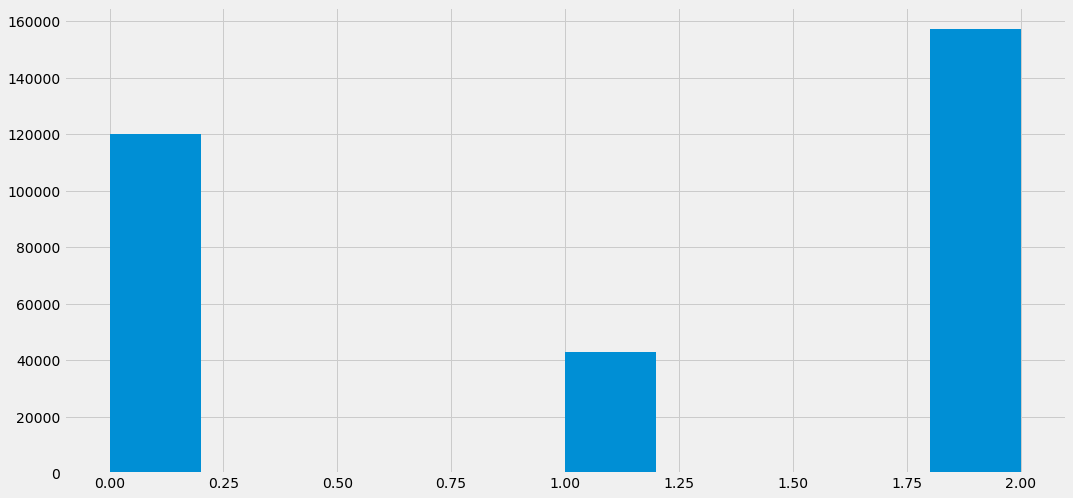

In [11]:
trn['class'].hist()

### 독립변수 분포

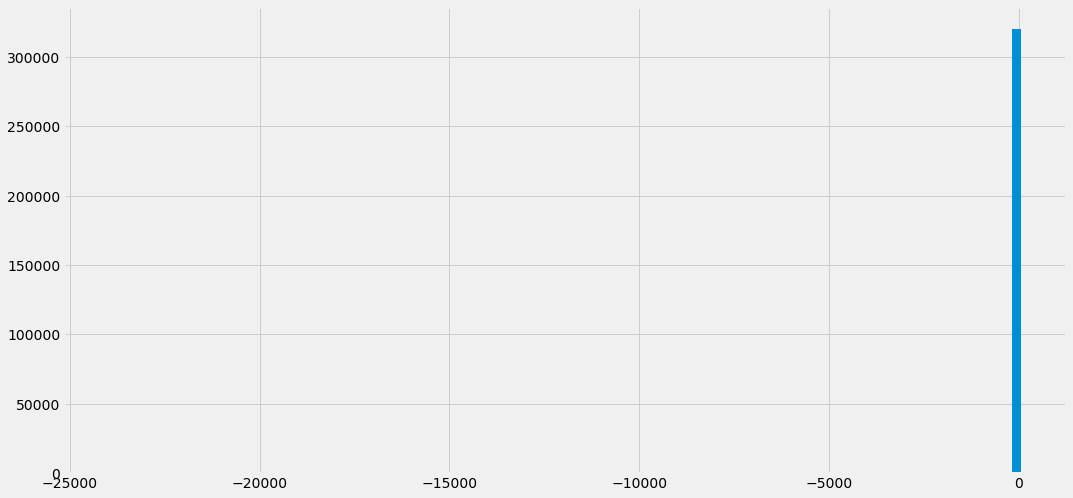

In [12]:
trn['i'].hist(bins=100)

In [13]:
np.arange(0, 1, .01)[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [14]:
trn['i'].quantile(np.arange(0, 1, .01))#n분포의값을알수있음

0.00   -23955.8178
0.01       14.4575
0.02       14.8731
0.03       15.0952
0.04       15.2494
           ...    
0.95       19.6769
0.96       19.8682
0.97       20.0562
0.98       20.2517
0.99       20.6046
Name: i, Length: 100, dtype: float64

In [15]:
trn.loc[trn['i'] < 0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
107428,19.3774,18.2789,17.9404,-23955.8178,-23955.8178,0.0671,19.1142,18.1270,17.8280,-9999.0000,-9999.0000,5,4,1.3060,1.3121,1.3002,1.3031,1.3090,2
134102,18.0590,19.3009,19.0443,-5.4550,13.4289,0.0349,18.0384,19.4843,19.3937,23.6095,24.1169,1,1,1.0693,1.0710,1.0678,1.0685,1.0701,2
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,0.0932,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
181371,14.6680,14.0357,13.7587,-23.9024,13.5329,0.0007,14.5893,13.9768,13.7133,24.4559,13.5264,2,2,1.2933,1.2867,1.3000,1.2966,1.2900,1


In [16]:
trn['dered_i'].quantile(np.arange(0, 1, .01))
#10프로는 14.1238
#40프로는 15.1070
#분포의 값을 알 수 있음 모든 값들이 14에서 20 내에 분포

0.00   -9999.0000
0.01      14.1238
0.02      14.6338
0.03      14.9256
0.04      15.1070
          ...    
0.95      19.6019
0.96      19.7939
0.97      19.9848
0.98      20.1736
0.99      20.5396
Name: dered_i, Length: 100, dtype: float64

In [17]:
trn.loc[trn['dered_i'] < 0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
75409,24.0610,23.8879,20.5890,18.1014,16.4314,1.6993e-04,-30.6337,-18.6560,-8.7560,-3.6973,0.2159,11,8,1.1858,1.1859,1.1859,1.1858,1.1858,0
107428,19.3774,18.2789,17.9404,-23955.8178,-23955.8178,6.7144e-02,19.1142,18.1270,17.8280,-9999.0000,-9999.0000,5,4,1.3060,1.3121,1.3002,1.3031,1.3090,2
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,9.3168e-02,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
203328,19.1628,17.7936,16.2919,15.1547,14.2541,2.1426e-04,-35.8185,-25.0458,-13.3443,-6.8683,-2.1271,10,9,1.2710,1.2660,1.2762,1.2735,1.2685,0
218728,22.2886,19.7721,17.6775,16.3672,15.1206,1.6016e-04,-41.0768,-29.4654,-16.3802,-8.9412,-3.7059,6,4,1.1851,1.1852,1.1852,1.1851,1.1852,0
294574,22.7283,20.9049,19.4225,17.8771,17.0411,-7.0816e-06,-42.8375,-30.3208,-16.0172,-8.4604,-2.5462,5,3,1.2579,1.2533,1.2627,1.2603,1.2556,0
295627,23.5286,20.9588,19.4514,17.8901,17.0632,-2.0197e-05,-42.8375,-30.3208,-16.0172,-8.4604,-2.5462,5,3,1.2579,1.2533,1.2627,1.2603,1.2556,0


### 시각화

In [18]:
trn_sample = trn.sample(n=10000, random_state=seed)     
# 만개만 샘플, 랜덤값을 고정적으로 seed 지정.(다른 user 에게도 같은 결과를 보여 줄 수 있다.)

In [ ]:
sns.pairplot(data=trn_sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5)
# class 값 0,1,2에 따라 변하는 u g r i z 와의 상관관계
#대부분 기울기가 양의 성분을 가짐

In [ ]:
sns.pairplot(data=trn_sample, vars=['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue='class', size=5)

In [ ]:
sns.pairplot(data=trn_sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)

In [ ]:
sns.pairplot(data=trn_sample, vars=['u', 'dered_u', 'airmass_u'], hue='class', size=5)

In [ ]:
sns.pairplot(data=trn_sample, vars=['redshift', 'nObserve', 'nDetect'], hue='class', size=5)

In [ ]:
trn.groupby('class').mean()
#CLASS 0,1,2 일때 독립변수들의 평균값

In [ ]:
trn.groupby('class').mean().T.plot(kind='barh')
#위의 표 시각화
#kind = 형태는 행과 열을 바꾼 barh, 행과 열 바뀌는 걸 원치 않을 경우는 bar

In [ ]:
#위 시각화 보면 airmass_u 부터 airmass_z 까지 class와의 상관관계 값들이 같아서 5개 중 1개 만 선택해서 봐도 무관

## 시험 데이터 로드

In [ ]:
tst = pd.read_csv(tst_file, index_col=0)
print(tst.shape)
tst.head()

## 학습/시험 데이터 결합

In [ ]:
df = pd.concat([trn, tst], axis=0)
#데이터 행열 결함 조건 axis: 0은 위아래로 결함, 1은 가로로 결합
print(df.shape)
#위아래로 결합한 결과 위에서 80000개가 400000개로 증가 
df.tail()
#앞 5줄은 NaN이 아닌데 끝 5줄은 NaN..( NaN: 수치형으로 표현 불가)

In [ ]:
df.fillna(-1, inplace=True)
#NaN 값을 -1로 변경(변경시 헷갈리지 않돋록 해당 컬럼에 없는 값들로 변경할 것)
df.tail()

## 피쳐 변환

In [ ]:
df['nObserve'].hist(bins=30) #다음 형태는 지수부포 형태(0일때 크고 점점 줄어듬)

In [ ]:
df['nObserve'] = df['nObserve'].apply(np.log1p) 

보통 위의 값들의 경우 log를 취함 => 낮은 값들로 바꾸어 줌 

EX> nObserver 의 경우 위 히스토에서는 0-40 이었지만 아래 히스토는 0-4 분포를 보임

그러나 추가로 +10을 해주는게 보기 좋음 EX> 0을 그대로 로그 취할 경우, 무한대 음수값으로 표현 힘듬

=>log1 을 log p 에 더(곱)함

In [ ]:
df['nObserve'].hist(bins=30)

## 피쳐 생성


In [ ]:
df['d_dered_u'] = df['dered_u'] - df['u']
df['d_dered_g'] = df['dered_g'] - df['g']
df['d_dered_r'] = df['dered_r'] - df['r']
df['d_dered_i'] = df['dered_i'] - df['i']
df['d_dered_z'] = df['dered_z'] - df['z']
df['d_dered_rg'] = df['dered_r'] - df['dered_g']
df['d_dered_ig'] = df['dered_i'] - df['dered_g']
df['d_dered_zg'] = df['dered_z'] - df['dered_g']
df['d_dered_ri'] = df['dered_r'] - df['dered_i']
df['d_dered_rz'] = df['dered_r'] - df['dered_z']
df['d_dered_iz'] = df['dered_i'] - df['dered_z']
df['d_obs_det'] = df['nObserve'] - df['nDetect']
print(df.shape)
df.head()

## 피쳐 삭제
불필요한 중복되는 피처 값들은 삭제 필요함

삭제에 필요한 값 알아보기 위해 아래 명령어 실행

(상관계수 값 확인을 위해 correlation)

In [ ]:
df.corr().style.background_gradient()

값이 클수록 색이 짙어짐

위를 보면 u 와 dered_u 의 상관관계 값이 비슷.( 모델링 돌리기 전에 삭제시, 간소화 o )

airmass_z 부터 g까지 거의 1 비슷 ->삭제

In [ ]:
df.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect', 'd_dered_rg', 'd_dered_ri'], 
        axis=1, inplace=True)
#axis=1은 칼럼 수정을 원한다 라는 의미
#inplace=true 는 위 데이터 프레임에서 변수 추가 없이 수정
print(df.shape)
df.head()
#새로운 학습 데이터 엑셀 파일(feature_file=feature.csv) 저장
df.to_csv(feature_file)